# Assignment 2 Report - Group 8

<b>Group 8 members: Maryam Shayan, Priyanka Garg, Peiling (Sebrina) Xian, Vinh Nguyen<b>

# Question 1

<b>1.1  What wrangling and aggregation methods have you applied?<b>

For this assignment, we used: 
   * pd.read_csv('price_demand_data.csv') to read the price_demand_data file
   * pd.read_csv('weather_data.csv') to read the weather_data file
   * df.head() to see what columns/fields there are in each data files
   * df.apply (lambda x: x.split()[0]) to get the date dd/mm/yyyy from SETTLEMENTDATE column in the price_demand_data file so we can join it with the weather_data file  
   * df.merge method to join the two above mentioned file
   * df.groupby and .max() methods to aggregate data by date 
   * df.fillna and .mean() methods to replace NaT value with mean value 
   * df.isnull() to double check that there is no NaT value in the columns used for analysis 

<b>1.2  Why have you chosen these methods over other alternatives?<b>  

We have chosen these methods over other alternatives because: 

  *
  *
  *


In [2]:
import pandas as pd

df1 = pd.read_csv('price_demand_data.csv')
df2 = pd.read_csv('weather_data.csv')

In [3]:
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW


In [4]:
df2.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


In [4]:
# Get the dd/mm/yyyy field from SETTLEMENTDATE so we can join it with the weather

df1['Date'] = df1['SETTLEMENTDATE'].apply(lambda x: x.split()[0])
df1.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021


In [5]:
# Merge the two datasets based on the date

data = df1.merge(df2, left_on='Date', right_on='Date')
data.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021,15.6,29.9,0.0,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3


In [6]:
# Aggreate data by date to have a single entry for each day
# Use max() method to select the maximum value for each day

aggregate_data = data.groupby('Date').max()
aggregate_data

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,,,,,
1/01/2021,VIC1,1/01/2021 9:30,5019.64,LOW,15.6,29.9,0.0,2.8,9.3,NNE,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1/02/2021,VIC1,1/02/2021 9:30,5228.29,MEDIUM,13.4,20.3,0.0,7.4,1.6,S,...,7,N,7,1012.8,19.4,69,7.0,S,13,1011.9
1/03/2021,VIC1,1/03/2021 9:30,5225.37,LOW,13.8,21.7,0.0,6.4,6.3,S,...,6,WSW,6,1012.3,19.7,67,6.0,S,15,1012.2
1/04/2021,VIC1,1/04/2021 9:30,5807.02,MEDIUM,12.4,29.9,0.0,4.4,10.8,NNW,...,1,NE,9,1024.3,28.7,30,3.0,SE,7,1021.6
1/05/2021,VIC1,1/05/2021 9:30,5261.09,MEDIUM,11.2,24.6,0.0,5.4,7.1,N,...,3,NNE,9,1027.3,24.2,35,7.0,N,17,1024.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/04/2021,VIC1,9/04/2021 9:30,5688.63,MEDIUM,13.8,17.3,6.2,6.4,7.9,S,...,5,W,13,1010.0,15.7,62,6.0,S,17,1009.6
9/05/2021,VIC1,9/05/2021 9:30,5222.89,MEDIUM,11.0,20.5,0.4,0.0,7.1,NW,...,6,,Calm,1018.4,19.5,45,3.0,WNW,6,1014.9
9/06/2021,VIC1,9/06/2021 9:30,7224.91,MEDIUM,7.8,14.7,4.0,1.6,0.5,S,...,7,SSW,4,1010.7,12.3,86,8.0,S,20,1008.8


In [7]:
# Replace NaT value with mean value

df = aggregate_data.fillna(aggregate_data.mean())
df

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,,,,,,,
1/01/2021,VIC1,1/01/2021 9:30,5019.64,LOW,15.6,29.9,0.000000,2.8,9.3,NNE,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1/02/2021,VIC1,1/02/2021 9:30,5228.29,MEDIUM,13.4,20.3,0.000000,7.4,1.6,S,...,7,N,7,1012.8,19.4,69,7.0,S,13,1011.9
1/03/2021,VIC1,1/03/2021 9:30,5225.37,LOW,13.8,21.7,0.000000,6.4,6.3,S,...,6,WSW,6,1012.3,19.7,67,6.0,S,15,1012.2
1/04/2021,VIC1,1/04/2021 9:30,5807.02,MEDIUM,12.4,29.9,0.000000,4.4,10.8,NNW,...,1,NE,9,1024.3,28.7,30,3.0,SE,7,1021.6
1/05/2021,VIC1,1/05/2021 9:30,5261.09,MEDIUM,11.2,24.6,0.000000,5.4,7.1,N,...,3,NNE,9,1027.3,24.2,35,7.0,N,17,1024.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/04/2021,VIC1,9/04/2021 9:30,5688.63,MEDIUM,13.8,17.3,6.200000,6.4,7.9,S,...,5,W,13,1010.0,15.7,62,6.0,S,17,1009.6
9/05/2021,VIC1,9/05/2021 9:30,5222.89,MEDIUM,11.0,20.5,0.400000,0.0,7.1,NW,...,6,,Calm,1018.4,19.5,45,3.0,WNW,6,1014.9
9/06/2021,VIC1,9/06/2021 9:30,7224.91,MEDIUM,7.8,14.7,4.000000,1.6,0.5,S,...,7,SSW,4,1010.7,12.3,86,8.0,S,20,1008.8


In [29]:
df.reset_index(inplace = True)
df

,Date,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,VIC1,1/01/2021 9:30,5019.64,LOW,15.6,29.9,0.000000,2.8,9.3,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,1/02/2021,VIC1,1/02/2021 9:30,5228.29,MEDIUM,13.4,20.3,0.000000,7.4,1.6,...,7,N,7,1012.8,19.4,69,7.0,S,13,1011.9
2,1/03/2021,VIC1,1/03/2021 9:30,5225.37,LOW,13.8,21.7,0.000000,6.4,6.3,...,6,WSW,6,1012.3,19.7,67,6.0,S,15,1012.2
3,1/04/2021,VIC1,1/04/2021 9:30,5807.02,MEDIUM,12.4,29.9,0.000000,4.4,10.8,...,1,NE,9,1024.3,28.7,30,3.0,SE,7,1021.6
4,1/05/2021,VIC1,1/05/2021 9:30,5261.09,MEDIUM,11.2,24.6,0.000000,5.4,7.1,...,3,NNE,9,1027.3,24.2,35,7.0,N,17,1024.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,9/04/2021,VIC1,9/04/2021 9:30,5688.63,MEDIUM,13.8,17.3,6.200000,6.4,7.9,...,5,W,13,1010.0,15.7,62,6.0,S,17,1009.6
239,9/05/2021,VIC1,9/05/2021 9:30,5222.89,MEDIUM,11.0,20.5,0.400000,0.0,7.1,...,6,,Calm,1018.4,19.5,45,3.0,WNW,6,1014.9
240,9/06/2021,VIC1,9/06/2021 9:30,7224.91,MEDIUM,7.8,14.7,4.000000,1.6,0.5,...,7,SSW,4,1010.7,12.3,86,8.0,S,20,1008.8
241,9/07/2021,VIC1,9/07/2021 9:30,7536.11,HIGH,2.0,12.0,1.576763,1.0,9.0,...,4,NE,4,1017.9,11.0,67,2.0,SSW,7,1015.7


In [8]:
# Check te columns again to make sure there is no NaT value left in the columns used for the analysis 

df.isnull().sum()

REGION                               0
SETTLEMENTDATE                       0
TOTALDEMAND                          0
PRICECATEGORY                        0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Evaporation (mm)                     0
Sunshine (hours)                     0
Direction of maximum wind gust       3
Speed of maximum wind gust (km/h)    0
Time of maximum wind gust            3
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am cloud amount (oktas)             0
9am wind direction                   1
9am wind speed (km/h)                1
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm cloud amount (oktas)             0
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64

# Question 2

<b>How have you gone about building your models and how do your models work?<b>


<b>Model 1: Regression - Predicting the maximum daily energy usage based on the provided weather data (the energy spot price)<b>

* Step 1: Y is the target variable (i.e. daily energy usage in Model 1 and daily price category in Model 2), X is the attributes or predictors
* Step 2: We used `train_test_split` to split the aggregate and cleaned dataset into 2 groups: train set and test set with the training set used to build the models and the test set used to validate it. 
* Step 3: Select attributes/predictors. We found that `Minimum temperature` and `Maximum temperature` attributes had a faily linear relationship with the `Total Demand for Energy Usage`, whereas `Rainfall` and `Sunshine hours` didn't. Thus, we selected `Minimum temperature` and `Maximum temperature` as predictors of the energy usage.
* Step 4: Run the linear regression model using sklearn 
* Step 5: Find Intercept and Coefficient of the prediction function 
* Step 6: Construct the prediction function: Max_Energy_Usage = 7136.05 - 123.24 x MinTemp + 18.37 x MaxTemp
* Step 7: Compare the predicted energy usage generated by the above function with the actual usage data from the given dataset to see how the model works

         
       

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Step 1 

Y = df['TOTALDEMAND']
X = df[['Minimum temperature (°C)', 'Maximum temperature (°C)']]

In [11]:
# Step 2

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [12]:
X_train.shape

(194, 2)

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

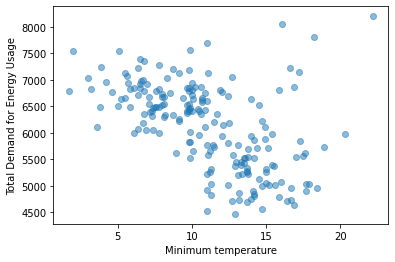

In [92]:
# Step 3
# Plot the relationship between 'Minimum temperature (°C)'  and 'Total Demand for Energy Usage'

plt.scatter(x = X_train['Minimum temperature (°C)'], y = Y_train, alpha = 0.5)
plt.xlabel('Minimum temperature')
plt.ylabel('Total Demand for Energy Usage')
plt.show()

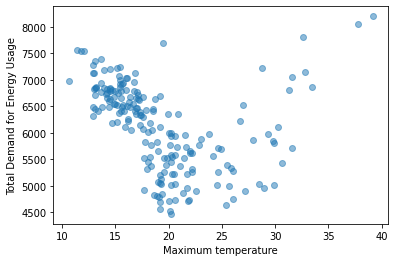

In [83]:
# Plot the relationship between 'Maximum temperature (°C)'  and 'Total Demand for Energy Usage'

plt.scatter(x = X_train['Maximum temperature (°C)'], y = Y_train, alpha = 0.5)
plt.xlabel('Maximum temperature')
plt.ylabel('Total Demand for Energy Usage')
plt.show()

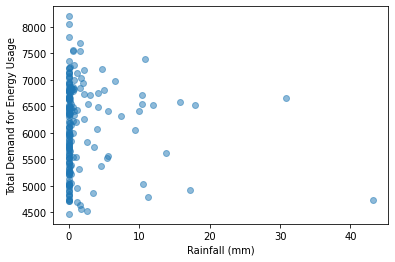

In [82]:
# (Don't run these codes. X_train no longer includes 'Rainfall'). Plot the relationship between 'Rainfall'  and 'Total Demand for Energy Usage'. 

plt.scatter(x = X_train['Rainfall (mm)'], y = Y_train, alpha = 0.5)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Total Demand for Energy Usage')
plt.show()

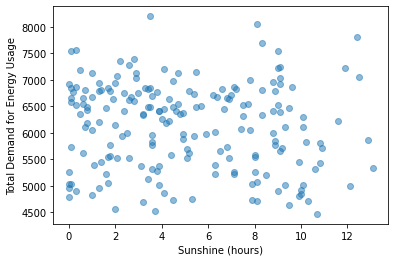

In [81]:
# (Don't run these codes. X_train no longer includes 'Sunshine'). Plot the relationship between 'Sunshine'  and 'Total Demand for Energy Usage'

plt.scatter(x = X_train['Sunshine (hours)'], y = Y_train, alpha = 0.5)
plt.xlabel('Sunshine (hours)')
plt.ylabel('Total Demand for Energy Usage')
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
# train the model 
model = LinearRegression().fit(X_train, Y_train)

In [16]:
# Step 4: predict values of y given our hidden test set
Y_pred = model.predict(X_test)

In [17]:
Y_test[:5], Y_pred[:5]

(Date
 12/01/2021    5349.30
 1/07/2021     6752.13
 27/01/2021    5221.53
 8/06/2021     7228.52
 9/04/2021     5688.63
 Name: TOTALDEMAND, dtype: float64,
 array([5277.64588987, 6158.09604432, 5847.82644152, 6232.47236186,
        5753.22114396]))

In [18]:
# Step 5: Find the intercept and coefficient of the prediction mode 

intercept = model.intercept_
coefficient = model.coef_
intercept, coefficient

(7136.049601011102, array([-123.24632796,   18.379819  ]))

In [19]:
# Step 6: Construct the prediction function 

MinTemp = X['Minimum temperature (°C)'].values
MaxTemp = X['Maximum temperature (°C)'].values

Max_Energy_Usage = 7136.05 - 123.24*MinTemp + 18.37*MaxTemp

In [34]:
# Step 7: Compare the predicted usage from the above function with the actual usage data 

Usage_comparision = pd.DataFrame(Max_Energy_Usage, columns = ['Predicted_Usage'])
Usage_comparision['Actual_Usage'] = df['TOTALDEMAND']
Usage_comparision.set_index(df['Date'], drop = False, inplace = True)

Usage_comparision

,Predicted_Usage,Actual_Usage
Date,,
1/01/2021,5762.769,5019.64
1/02/2021,5857.545,5228.29
1/03/2021,5833.967,5225.37
1/04/2021,6157.137,5807.02
1/05/2021,6207.664,5261.09
...,...,...
9/04/2021,5753.139,5688.63
9/05/2021,6156.995,5222.89
9/06/2021,6444.817,7224.91


<b>Model 2: Classification: Predicting the maximum daily price category based on the provided weather data (category of usage)<b>

* Use K nearest neighbor 
We create a decision tree to split attributes in the training set using Hunt's algorithm. If one record belongs to more than one class, we use an attribute test to split the data into smaller subsets. Recursively apply the procedure to each subset until we end up with pure nodes.   DT Model was used to test data. 
We use Entropy and Mutual Information measurements to determine the most preditive attributes, which  are the most correlated with the target variable (i.e. energy price).
Minimum temperature (°C) attribute has continuous values. We apply 3 way split with a faily equal interval from min value to max value: (1.7, 9), (9, 16), (16, 22.2)  

In [13]:
Y = cleaned_aggregate_data['PRICECATEGORY']
X = cleaned_aggregate_data[['TOTALDEMAND', 'Minimum temperature (°C)', 'Maximum temperature (°C)']]

In [15]:
# Check the value in PRICECATEGORY
import numpy as np
np.unique(cleaned_aggregate_data['PRICECATEGORY'])

array(['HIGH', 'LOW', 'MEDIUM'], dtype=object)

In [ ]:
# Pre-process ordinal data. Reference doc is found here: https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()


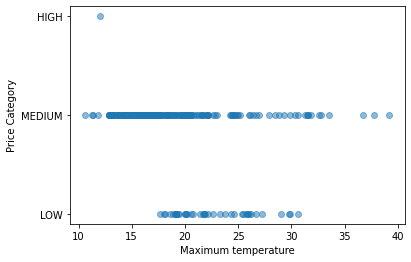

In [69]:
plt.scatter(x = df['Maximum temperature (°C)'], y = df['PRICECATEGORY'], alpha = 0.5)
plt.xlabel('Maximum temperature')
plt.ylabel('Price Category')
plt.show()

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

# Discretise the maximum temperatures into 3 bins of equal width
equal_width = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'uniform')

# a transformed verion of 
df['binned_max_temperature'] = equal_width.fit_transform(df['Maximum temperature (°C)'].to_numpy(). \
                                                                            reshape(-1, 1)).astype(int)

In [ ]:
# a transformed verion of 
# df['binned_price_category'] = equal_width.fit_transform(df['PRICECATEGORY'].to_numpy(). \
                                                                           # reshape(-1, 1)).astype(int)

In [ ]:
# Compute NMI score between maximum temperature and 

from sklearn.metrics import normalized_mutual_info_score

normalized_mutual_info_score(data['binned_time_on_site'], 
                             data['binned_quantity'], 
                             
                             # we use min here because in NMI, we want to have our demoninator
                             # to be min(H(X), H(Y))
                             average_method='min')

# Question 3

<b>3.1  How effective are your models?

Model 1 is not effective

<b>3.2  How have you evaluated this?<b>

We use two metrics to evaluate our models 
* `mean_squared_error` (MSE): The lower the better, but only useful when comparing models.
* `r2_score` (R$^2$): Between 0 and 1, where a higher R$^2$  indicates a better fit.

In [115]:
# Model 1: R2 is only 0.19 which is very low. 
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(Y_test, Y_pred)
R2 = lm.score(X_test, Y_test)
MSE, R2

(596100.1674841428, 0.16662550824789024)

# Question 4

<b>What insights can you draw from your analysis? For example, which input variables
are most valuable for predicting energy usage/price?<b>

For predicting Energy usage:

For predicting price:

From the decision tree model, we can see from this picture that:

* TOTALDEMAND is the most importance feature
* Evaporation is the next most valuable 
* This is a 6 level tree
* Entropy at the leaf node almost reach to zero

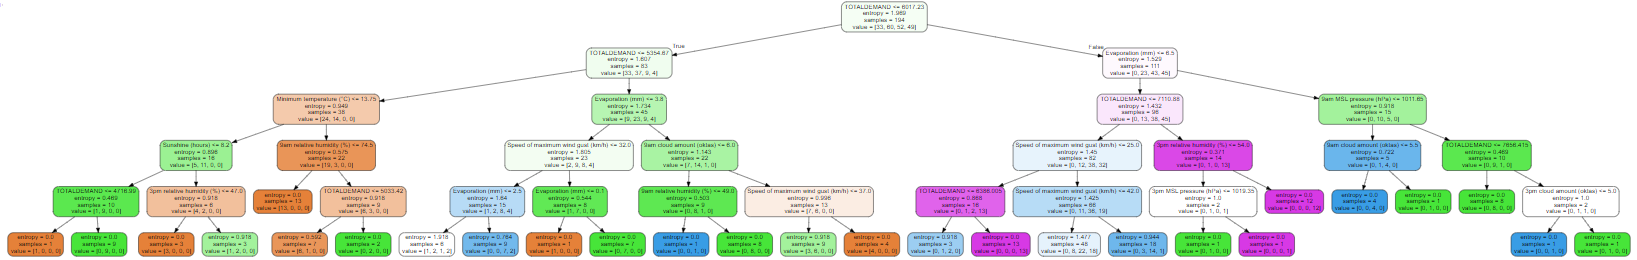

# Question 5

<b>Why are your results significant and valuable?<b>

We use the maximum value of the day as the aggregated raw dataset

Why 

For model one:

For model two:

Because we use the Classification method - decision tree model to predicting the price, the important result/value after we run the model are:
* Decision tree shows us the hirarcy importance of each features we send through to the model. Here in our model, 
  the most important feature is: Total Demand > Evaporation > Minimum Temperature and so on.
* By analizing the Information gain of this decision tree: 
  1. At root node:
  * H(TOTALDEMAND) - entropy of the class label TOTALDEMAND, we can read directly from the graph, which is 1.969 at the root node.
  * Sample = 194 means there were 194 instances of training data which have been put to the model. Where (194/243)*100% = 80%, that is exactly the 80% of dataset's data as training data.
  * where 243-194 = 49, means 49 instances as testing data, and (49/243)*100% = 20%.
  * Value[33,60,52,49] means there are four groups which refers to the four price category. In these training data, there are 33 in Low price category, 60 in Median, 52 in High, and 49 in Extrem. When add these four group's number up 33+60+52+49 = 194. 
  * We can calculate the Information Gain(IG) from this graph:
      when 5354.67 < TOTALDEMAND <= 6017.23, we need add feature Evaporation(mm) <= 6.5 to split down the tree. and the IG of these two levels is IG = 1.969-1.529 = 0.44. which is ok.
      
  



# Question 6

<b>What are the limitations of your results and how can the project be improved for future?<b>